##### Project 3 #####

* Student name: Abdullah Al Daffaie
* Student pace: full time
* Instructor name: Abhineet Kulkarni

In [1]:
# Import needed libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Read CSV files
data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

/Users/abdullahaldaffaie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = data [['CRASH_DATE','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE',
          'DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
         'ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','CRASH_TYPE','INTERSECTION_RELATED_I',
         'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE',
         'DOORING_I','WORK_ZONE_I','MOST_SEVERE_INJURY','INJURIES_TOTAL','INJURIES_FATAL',
         'INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT'
         ,'INJURIES_NO_INDICATION','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH'
         ,'LATITUDE','LONGITUDE','LOCATION','WORKERS_PRESENT_I']]

In [4]:
data['PRIM_CONTRIBUTORY_CAUSE'] = [j if i in ['UNABLE TO DETERMINE', 'NOT APPLICABLE'] and 
                                 j not in ['UNABLE TO DETERMINE', 'NOT APPLICABLE'] else 
                                 i for i,j in zip(data['PRIM_CONTRIBUTORY_CAUSE'], data['SEC_CONTRIBUTORY_CAUSE'])]

In [5]:
df = data.drop(['CRASH_DATE','LOCATION'], axis=1) 

In [6]:
bi_cols = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I', 
            'DOORING_I', 'WORK_ZONE_I','WORKERS_PRESENT_I']

In [7]:
for col in bi_cols:
    df[col] = df[col].map(lambda x: 1 if x =='Y' else 0)
    print(df[col].value_counts())
    print('Number of nulls:' , df[col].isnull().sum())
    print("")

0    374144
1    102669
Name: INTERSECTION_RELATED_I, dtype: int64
Number of nulls: 0

0    456373
1     20440
Name: NOT_RIGHT_OF_WAY_I, dtype: int64
Number of nulls: 0

0    343189
1    133624
Name: HIT_AND_RUN_I, dtype: int64
Number of nulls: 0

0    475753
1      1060
Name: DOORING_I, dtype: int64
Number of nulls: 0

0    474363
1      2450
Name: WORK_ZONE_I, dtype: int64
Number of nulls: 0

0    476151
1       662
Name: WORKERS_PRESENT_I, dtype: int64
Number of nulls: 0



In [8]:
df.replace(to_replace={'UNKNOWN': np.nan, 'OTHER':np.nan, 
                       'NOT APPLICABLE': np.nan, 'UNABLE TO DETERMINE': np.nan}, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       17555
FOLLOWING TOO CLOSELY                                                               16265
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8099
IMPROPER OVERTAKING/PASSING                                                          7741
IMPROPER LANE USAGE                                                                  5884
IMPROPER TURNING/NO SIGNAL                                                           5649
IMPROPER BACKING                                                                     5444
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3922
DISREGARDING TRAFFIC SIGNALS                                                         3366
WEATHER                                                                              2822
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     2485
DISREGARDI

In [11]:
crash_cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY':'FAILING TO YIELD RIGHT-OF-WAY', 
                    'FOLLOWING TOO CLOSELY':'FOLLOWING TOO CLOSELY', 
                    'IMPROPER OVERTAKING/PASSING':'IMPROPER OVERTAKING/PASSING', 
                    'FAILING TO REDUCE SPEED TO AVOID CRASH':'FAILING TO REDUCE SPEED TO AVOID CRASH', 
                    'IMPROPER BACKING': 'IMPROPER BACKING',
                    'IMPROPER LANE USAGE':'OTHER', 'IMPROPER TURNING/NO SIGNAL':'OTHER',
                    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':'OTHER',
                    'DISREGARDING TRAFFIC SIGNALS':'OTHER', 'WEATHER':'OTHER',
                    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':'OTHER',
                    'DISREGARDING STOP SIGN':'OTHER', 'DISTRACTION - FROM INSIDE VEHICLE':'OTHER',
                    'PHYSICAL CONDITION OF DRIVER':'OTHER', 'EQUIPMENT - VEHICLE CONDITION':'OTHER',
                    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':'OTHER',
                    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':'OTHER',
                    'DRIVING ON WRONG SIDE/WRONG WAY':'OTHER', 'DISTRACTION - FROM OUTSIDE VEHICLE':'OTHER',
                    'EXCEEDING AUTHORIZED SPEED LIMIT':'OTHER', 'EXCEEDING SAFE SPEED FOR CONDITIONS':'OTHER',
                    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':'OTHER',
                    'ROAD CONSTRUCTION/MAINTENANCE':'OTHER', 'DISREGARDING OTHER TRAFFIC SIGNS':'OTHER',
                    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':'OTHER',
                    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'OTHER',
                    'CELL PHONE USE OTHER THAN TEXTING': 'OTHER',
                    'DISREGARDING ROAD MARKINGS':'OTHER', 'ANIMAL':'OTHER',
                    'TURNING RIGHT ON RED':'OTHER',
                    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'OTHER',
                    'TEXTING':'OTHER','DISREGARDING YIELD SIGN':'OTHER',
                    'RELATED TO BUS STOP':'OTHER', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT':'OTHER',
                    'PASSING STOPPED SCHOOL BUS':'OTHER', 'OBSTRUCTED CROSSWALKS':'OTHER',
                    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':'OTHER'}
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(crash_cause_dict)
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

OTHER                                     38818
FAILING TO YIELD RIGHT-OF-WAY             17555
FOLLOWING TOO CLOSELY                     16265
FAILING TO REDUCE SPEED TO AVOID CRASH     8099
IMPROPER OVERTAKING/PASSING                7741
IMPROPER BACKING                           5444
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [12]:
df.isnull().sum()

POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
DOORING_I                        0
WORK_ZONE_I                      0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
LATITUDE                         0
LONGITUDE           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93922 entries, 2 to 476811
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POSTED_SPEED_LIMIT             93922 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         93922 non-null  object 
 2   DEVICE_CONDITION               93922 non-null  object 
 3   WEATHER_CONDITION              93922 non-null  object 
 4   LIGHTING_CONDITION             93922 non-null  object 
 5   FIRST_CRASH_TYPE               93922 non-null  object 
 6   ALIGNMENT                      93922 non-null  object 
 7   ROADWAY_SURFACE_COND           93922 non-null  object 
 8   ROAD_DEFECT                    93922 non-null  object 
 9   CRASH_TYPE                     93922 non-null  object 
 10  INTERSECTION_RELATED_I         93922 non-null  int64  
 11  NOT_RIGHT_OF_WAY_I             93922 non-null  int64  
 12  HIT_AND_RUN_I                  93922 non-null

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
df1 = pd.concat([df.drop([ 'MOST_SEVERE_INJURY', 
                          'CRASH_TYPE', 'ROADWAY_SURFACE_COND', 'ALIGNMENT',
                          'LIGHTING_CONDITION','WEATHER_CONDITION','TRAFFIC_CONTROL_DEVICE',
                          'DEVICE_CONDITION','FIRST_CRASH_TYPE','ROAD_DEFECT',
                          'SEC_CONTRIBUTORY_CAUSE'], axis=1),
                pd.get_dummies(df['MOST_SEVERE_INJURY']),
                pd.get_dummies(df['CRASH_TYPE']),
                pd.get_dummies(df['ROADWAY_SURFACE_COND']),
                pd.get_dummies(df['ALIGNMENT']),
                pd.get_dummies(df['LIGHTING_CONDITION']),
                pd.get_dummies(df['WEATHER_CONDITION']), 
                pd.get_dummies(df['TRAFFIC_CONTROL_DEVICE']),
                pd.get_dummies(df['DEVICE_CONDITION']),
                pd.get_dummies(df['FIRST_CRASH_TYPE']),
                pd.get_dummies(df['ROAD_DEFECT']),
                pd.get_dummies(df['SEC_CONTRIBUTORY_CAUSE'])],axis=1)
df1.reset_index(drop=True, inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93922 entries, 0 to 93921
Columns: 136 entries, POSTED_SPEED_LIMIT to WEATHER
dtypes: float64(8), int64(10), object(1), uint8(117)
memory usage: 24.1+ MB


In [17]:
df1.head().T

,0,1,2,3,4
POSTED_SPEED_LIMIT,30,30,15,30,20
INTERSECTION_RELATED_I,0,0,0,0,0
NOT_RIGHT_OF_WAY_I,0,0,0,0,0
HIT_AND_RUN_I,0,0,0,0,0
PRIM_CONTRIBUTORY_CAUSE,FAILING TO YIELD RIGHT-OF-WAY,OTHER,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,OTHER
...,...,...,...,...,...
TEXTING,0,0,0,0,0
TURNING RIGHT ON RED,0,0,0,0,0
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),0,0,0,0,0
"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",0,0,0,0,0


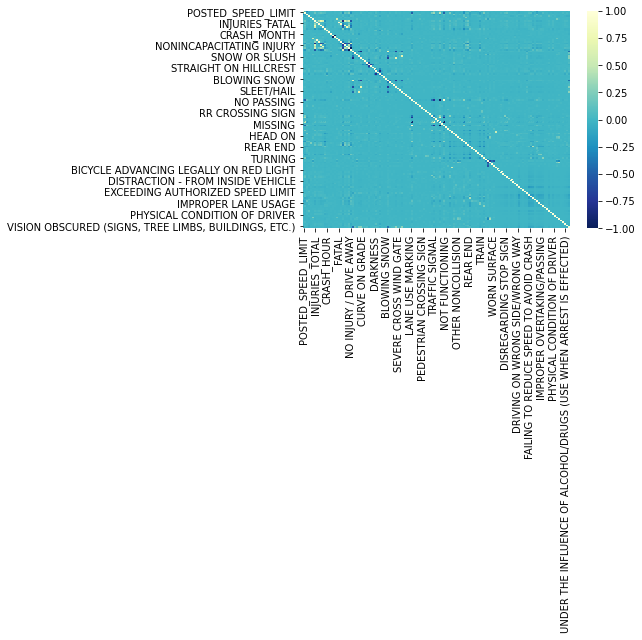

In [18]:
sns.heatmap(df1.corr(), cmap='YlGnBu_r')
plt.show()

# - Decision Tree

In [19]:
x = df1.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1).values
y = df1['PRIM_CONTRIBUTORY_CAUSE'].values
X = StandardScaler().fit(x).transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
dtree = DecisionTreeClassifier(random_state=42)

In [22]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
yhat1 = dtree.predict(x_test)

In [24]:
print(confusion_matrix(y_test, yhat1))
print(classification_report(y_test, yhat1))

[[ 415  157  379   55   85  558]
 [ 163 1478  171  146  310 1306]
 [ 398  164 1808   70  101  646]
 [  63  125   62  489   52  291]
 [  76  272  112   46  462  580]
 [ 589 1314  662  311  625 4244]]
                                        precision    recall  f1-score   support

FAILING TO REDUCE SPEED TO AVOID CRASH       0.24      0.25      0.25      1649
         FAILING TO YIELD RIGHT-OF-WAY       0.42      0.41      0.42      3574
                 FOLLOWING TOO CLOSELY       0.57      0.57      0.57      3187
                      IMPROPER BACKING       0.44      0.45      0.44      1082
           IMPROPER OVERTAKING/PASSING       0.28      0.30      0.29      1548
                                 OTHER       0.56      0.55      0.55      7745

                              accuracy                           0.47     18785
                             macro avg       0.42      0.42      0.42     18785
                          weighted avg       0.48      0.47      0.47     18785

# - Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier(n_estimators=75)
rf_model.fit(x_train, y_train)
yhat2 = rf_model.predict(x_test)

In [31]:
print(confusion_matrix(y_test, yhat2))
print(classification_report(y_test, yhat2))

[[ 272  127  572   24   39  615]
 [  18 1665  150   92  174 1475]
 [ 108   53 2588   20   61  357]
 [   9  108   70  566   15  314]
 [  10  186   86   21  471  774]
 [  83  902  800  134  306 5520]]
                                        precision    recall  f1-score   support

FAILING TO REDUCE SPEED TO AVOID CRASH       0.54      0.16      0.25      1649
         FAILING TO YIELD RIGHT-OF-WAY       0.55      0.47      0.50      3574
                 FOLLOWING TOO CLOSELY       0.61      0.81      0.69      3187
                      IMPROPER BACKING       0.66      0.52      0.58      1082
           IMPROPER OVERTAKING/PASSING       0.44      0.30      0.36      1548
                                 OTHER       0.61      0.71      0.66      7745

                              accuracy                           0.59     18785
                             macro avg       0.57      0.50      0.51     18785
                          weighted avg       0.58      0.59      0.57     18785

# - Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg_model = LogisticRegression(C=0.06)
log_reg_model.fit(x_train, y_train)
yhat3 = log_reg_model.predict(x_test)


/Users/abdullahaldaffaie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(confusion_matrix(y_test, yhat3))
print(classification_report(y_test, yhat3))

[[  72  119  728   20   26  684]
 [   4 1557  166   85  137 1625]
 [  66   48 2570   17   50  436]
 [   3  137   74  523    4  341]
 [   2  200   74    6  398  868]
 [  39 1045  814  115  245 5487]]
                                        precision    recall  f1-score   support

FAILING TO REDUCE SPEED TO AVOID CRASH       0.39      0.04      0.08      1649
         FAILING TO YIELD RIGHT-OF-WAY       0.50      0.44      0.47      3574
                 FOLLOWING TOO CLOSELY       0.58      0.81      0.68      3187
                      IMPROPER BACKING       0.68      0.48      0.57      1082
           IMPROPER OVERTAKING/PASSING       0.46      0.26      0.33      1548
                                 OTHER       0.58      0.71      0.64      7745

                              accuracy                           0.56     18785
                             macro avg       0.53      0.46      0.46     18785
                          weighted avg       0.54      0.56      0.53     18785